In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/7.PCA/wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.data = wine.iloc[:,1:] #slicing operation

wine_val=wine.data.values # considering only values for standaardization of data

C:\Users\Swathi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [4]:
#standardize dataframe

from sklearn.preprocessing import scale

wine_std = scale(wine_val)
# print(wine_std)

In [5]:
#calculate PCA

from sklearn.decomposition import PCA

pca = PCA()
pca_values = pca.fit_transform(wine_std)

In [6]:
# # weighted avg
# print(pca.components_[0:])

In [7]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
print(var)

# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
print(var1)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
[ 36.2   55.41  66.53  73.6   80.16  85.1   89.34  92.02  94.24  96.17
  97.91  99.21 100.01]


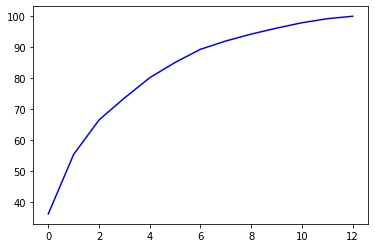

In [8]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="blue")
plt.show()

C:\Users\Swathi\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


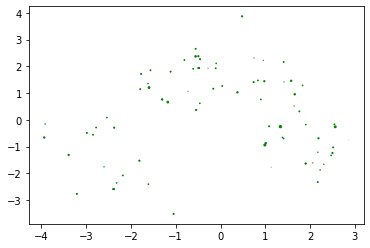

In [9]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z=  pca_values[:,2:3]

plt.scatter(x,y,z, color = "green")
plt.show()

In [10]:
# ******** KMEANS CLUSTERING ************

In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

df_pca = pca_values[:,0:3]
# df_pca

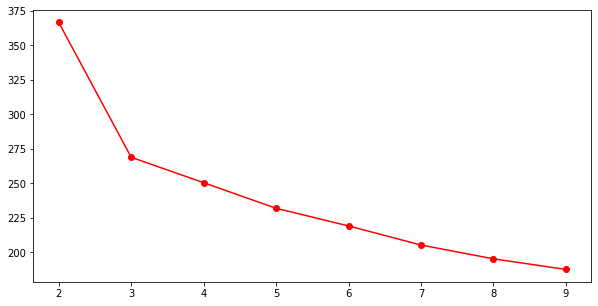

In [12]:
#Generate Elbow Curve

k = list(range(2,10))

Total_WSS=[]

for i in k:
    kmean=KMeans(n_clusters=i).fit(df_pca)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(df_pca[kmean.labels_==j,:],kmean.cluster_centers_[j].reshape(1,df_pca.shape[1]),"euclidean" )))
    Total_WSS.append(sum(WSS))
plt.figure(figsize=(10,5))
plt.plot(k,Total_WSS,'ro-') 
plt.xticks(k)
plt.show()

In [13]:
# Applying K-means clustering

Kmean_model=KMeans(n_clusters=3).fit(df_pca)
model_labels=pd.Series(Kmean_model.labels_)  # converting numpy array into pandas series object 

# model_labels
wine['Kmean_cluster']=model_labels # creating a  new column and assigning it to new column 
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmean_cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [14]:
# **** HierarchicalClustering *******

In [15]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering 

In [16]:
df_Hier = pca_values[:,0:3]
# df_Hier

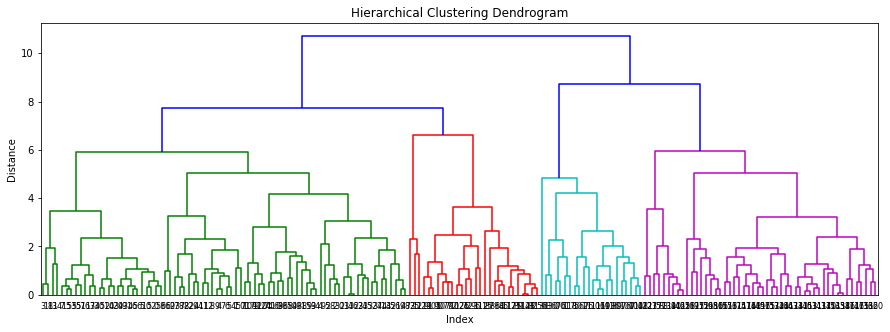

In [17]:
#Create Dendogram

link = linkage(df_Hier, method="complete", metric="euclidean")

plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(link,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [18]:
#Apply Hierarchical Clustering
hier_cluster= AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(df_Hier)
cluster_label= pd.Series(hier_cluster.labels_)
wine["Hier_Cluster"] = cluster_label
wine.head(3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmean_cluster,Hier_Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,3


In [19]:
wine.to_csv("PCA_clustering.csv")